## Exploratory Data Analysis (EDA):

### Import Liabraries :

In [49]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import seaborn as sns

Load the dataset into a pandas DataFrame:

In [50]:
data_path = "../raw_data/aw_fb_data.csv"

df = pd.read_csv(data_path)

df

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,6260,3666,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,0.000000,1.000000,fitbit,Running 7 METs
6260,6261,3667,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs
6261,6262,3668,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs
6262,6263,3669,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs


In [51]:
df.shape

(6264, 20)

In [52]:
df.dtypes

Unnamed: 0                int64
X1                        int64
age                       int64
gender                    int64
height                  float64
weight                  float64
steps                   float64
hear_rate               float64
calories                float64
distance                float64
entropy_heart           float64
entropy_setps           float64
resting_heart           float64
corr_heart_steps        float64
norm_heart              float64
intensity_karvonen      float64
sd_norm_heart           float64
steps_times_distance    float64
device                   object
activity                 object
dtype: object

In [53]:
df.columns

Index(['Unnamed: 0', 'X1', 'age', 'gender', 'height', 'weight', 'steps',
       'hear_rate', 'calories', 'distance', 'entropy_heart', 'entropy_setps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'device', 'activity'],
      dtype='object')

In [54]:
df['activity'].unique()

array(['Lying', 'Sitting', 'Self Pace walk', 'Running 3 METs',
       'Running 5 METs', 'Running 7 METs'], dtype=object)

In [55]:
df.describe()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance
count,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000
mean,3132.500000,1771.144317,29.158525,0.476533,169.709052,69.614464,109.562268,86.142331,19.471823,13.832555,6.030314,5.739984,65.869938,0.306447,20.272393,0.155479,8.110854,590.035239
std,1808.405375,1097.988748,8.908978,0.499489,10.324698,13.451878,222.797908,28.648385,27.309765,45.941437,0.765574,1.256348,21.203017,0.775418,28.388116,0.210927,12.535080,4063.838530
min,1.000000,1.000000,18.000000,0.000000,143.000000,43.000000,1.000000,2.222222,0.056269,0.000440,0.000000,0.000000,3.000000,-1.000000,-76.000000,-2.714286,0.000000,0.000690
25%,1566.750000,789.750000,23.000000,0.000000,160.000000,60.000000,5.159534,75.598079,0.735875,0.019135,6.108524,5.909440,58.134333,-0.467303,1.148883,0.009819,0.264722,0.659260
50%,3132.500000,1720.000000,28.000000,0.000000,168.000000,68.000000,10.092029,77.267680,4.000000,0.181719,6.189825,6.157197,75.000000,0.665829,9.820254,0.079529,2.893503,13.368619
75%,4698.250000,2759.250000,33.000000,1.000000,180.000000,77.300000,105.847222,95.669118,20.500000,15.697188,6.247928,6.247928,76.138701,1.000000,27.077336,0.211868,9.679672,93.728562
max,6264.000000,3670.000000,56.000000,1.000000,191.000000,115.000000,1714.000000,194.333333,97.500000,335.000000,6.475733,6.475733,155.000000,1.000000,156.319444,1.297980,74.457929,51520.000000


### Data Cleaning :

In [56]:
df1 = df.copy()  
df1.drop(['Unnamed: 0', 'X1'], axis=1, inplace=True)
df1.head()

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


In [57]:
df1.columns

Index(['age', 'gender', 'height', 'weight', 'steps', 'hear_rate', 'calories',
       'distance', 'entropy_heart', 'entropy_setps', 'resting_heart',
       'corr_heart_steps', 'norm_heart', 'intensity_karvonen', 'sd_norm_heart',
       'steps_times_distance', 'device', 'activity'],
      dtype='object')

In [58]:
df1.rename(columns={'hear_rate': 'heart_rate', 'entropy_setps': 'entropy_steps'}, inplace=True)

df1.columns

Index(['age', 'gender', 'height', 'weight', 'steps', 'heart_rate', 'calories',
       'distance', 'entropy_heart', 'entropy_steps', 'resting_heart',
       'corr_heart_steps', 'norm_heart', 'intensity_karvonen', 'sd_norm_heart',
       'steps_times_distance', 'device', 'activity'],
      dtype='object')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'age'),
  Text(1, 0, 'gender'),
  Text(2, 0, 'height'),
  Text(3, 0, 'weight'),
  Text(4, 0, 'steps'),
  Text(5, 0, 'heart_rate'),
  Text(6, 0, 'calories'),
  Text(7, 0, 'distance'),
  Text(8, 0, 'entropy_heart'),
  Text(9, 0, 'entropy_steps'),
  Text(10, 0, 'resting_heart'),
  Text(11, 0, 'corr_heart_steps'),
  Text(12, 0, 'norm_heart'),
  Text(13, 0, 'intensity_karvonen'),
  Text(14, 0, 'sd_norm_heart'),
  Text(15, 0, 'steps_times_distance')])

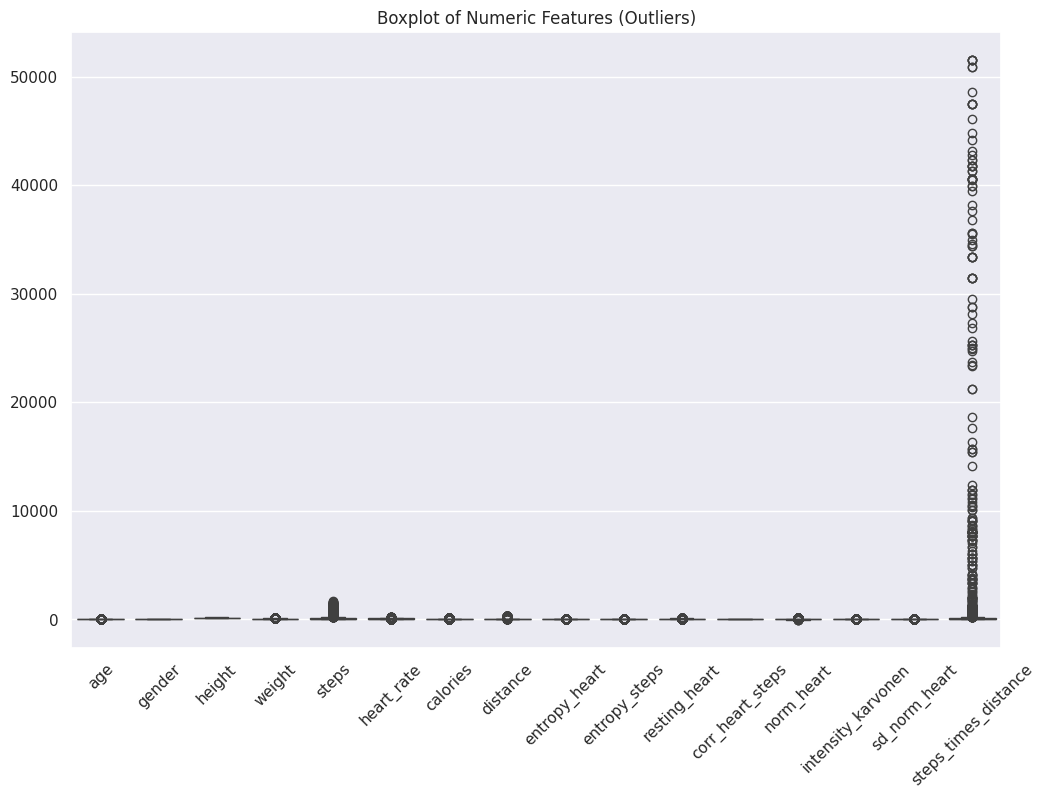

In [59]:
numeric_columns = df1.select_dtypes(include='number')

plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_columns)
plt.title('Boxplot of Numeric Features (Outliers)')
plt.xticks(rotation=45)

In [60]:
df1.isnull().sum()

age                     0
gender                  0
height                  0
weight                  0
steps                   0
heart_rate              0
calories                0
distance                0
entropy_heart           0
entropy_steps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
device                  0
activity                0
dtype: int64

In [61]:
df1 = df1.dropna()

In [62]:
print(df1.duplicated().sum())

10


### Splitting Data as Apple and Fitbit :

In [63]:
df1_apple = df1[df1['device']=='apple watch']
df1_fitbit = df1[df1['device']=='fitbit']

In [64]:
df1_apple.head()

,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


In [65]:
df1_fitbit.head()

,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
3656,20,1,168.0,65.4,1.0,132.000000,1.0,1.0,5.938588,2.179799,130.428571,1.000000,1.571429,0.022587,1.000000,1.0,fitbit,Lying
3657,20,1,168.0,65.4,1.0,132.777778,1.0,1.0,5.938588,2.179799,130.428571,1.000000,2.349206,0.033767,1.000000,1.0,fitbit,Lying
3658,20,1,168.0,65.4,1.0,129.888889,1.0,1.0,5.938588,2.179799,130.428571,1.000000,-0.539683,-0.007757,1.000000,1.0,fitbit,Lying
3659,20,1,168.0,65.4,1.0,129.142857,1.0,1.0,5.938588,2.179799,130.428571,1.000000,-1.285714,-0.018480,1.000000,1.0,fitbit,Lying
3660,20,1,168.0,65.4,1.0,134.555556,3.5,1.0,5.938588,2.179799,130.428571,-0.493589,4.126984,0.059320,1.368007,1.0,fitbit,Self Pace walk


In [66]:
df1_fitbit['activity'].value_counts()

activity
Lying             592
Running 7 METs    501
Running 5 METs    399
Running 3 METs    378
Sitting           378
Self Pace walk    360
Name: count, dtype: int64

In [67]:
df1_apple['activity'].value_counts()

activity
Lying             787
Running 7 METs    613
Running 5 METs    603
Running 3 METs    572
Sitting           552
Self Pace walk    529
Name: count, dtype: int64

<Axes: ylabel='count'>

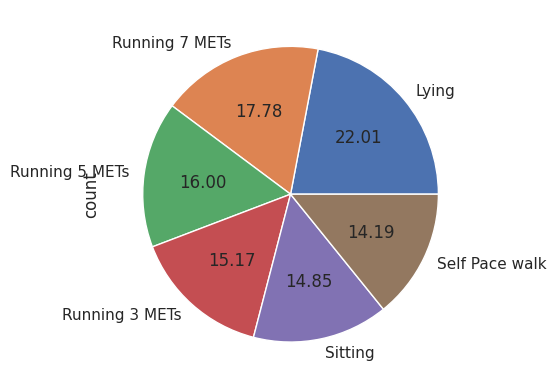

In [68]:
df1['activity'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

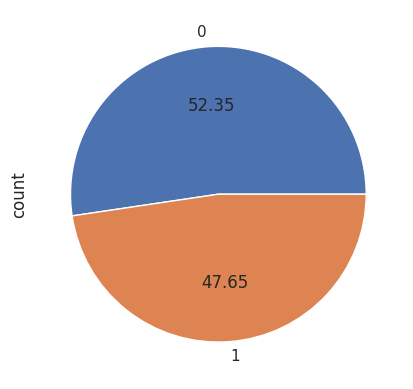

In [69]:
df1['gender'].value_counts().plot(kind='pie',autopct='%.2f')

In [70]:
df_num= df1.select_dtypes(include="number")

<Axes: >

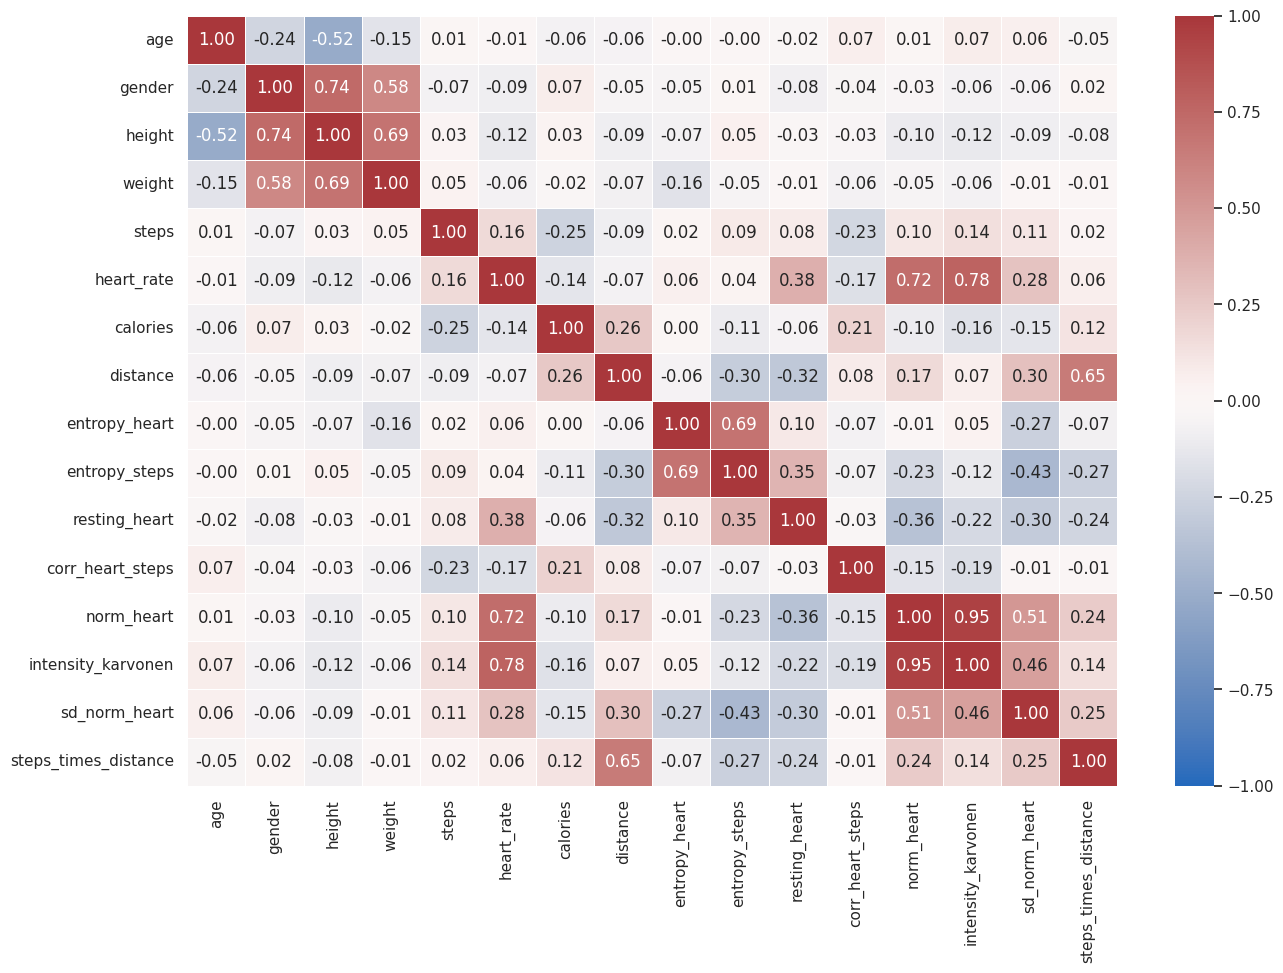

In [71]:
plt.figure(figsize=(15,10))
sns.heatmap(df_num.corr(), annot=True, center=0, linewidths=.5, fmt='.2f', vmin=-1, vmax=1, cmap='vlag')

<Axes: xlabel='device', ylabel='activity'>

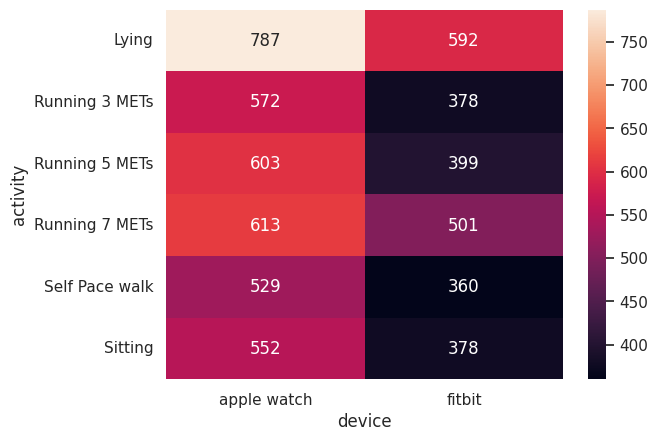

In [72]:
sns.heatmap(pd.crosstab(df1["activity"],df1["device"]),annot=True,fmt='d')

In [73]:
df1.device.value_counts()

device
apple watch    3656
fitbit         2608
Name: count, dtype: int64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'steps'}>,
        <Axes: title={'center': 'heart_rate'}>,
        <Axes: title={'center': 'calories'}>,
        <Axes: title={'center': 'distance'}>],
       [<Axes: title={'center': 'entropy_heart'}>,
        <Axes: title={'center': 'entropy_steps'}>,
        <Axes: title={'center': 'resting_heart'}>,
        <Axes: title={'center': 'corr_heart_steps'}>],
       [<Axes: title={'center': 'norm_heart'}>,
        <Axes: title={'center': 'intensity_karvonen'}>,
        <Axes: title={'center': 'sd_norm_heart'}>,
        <Axes: title={'center': 'steps_times_distance'}>]], dtype=object)

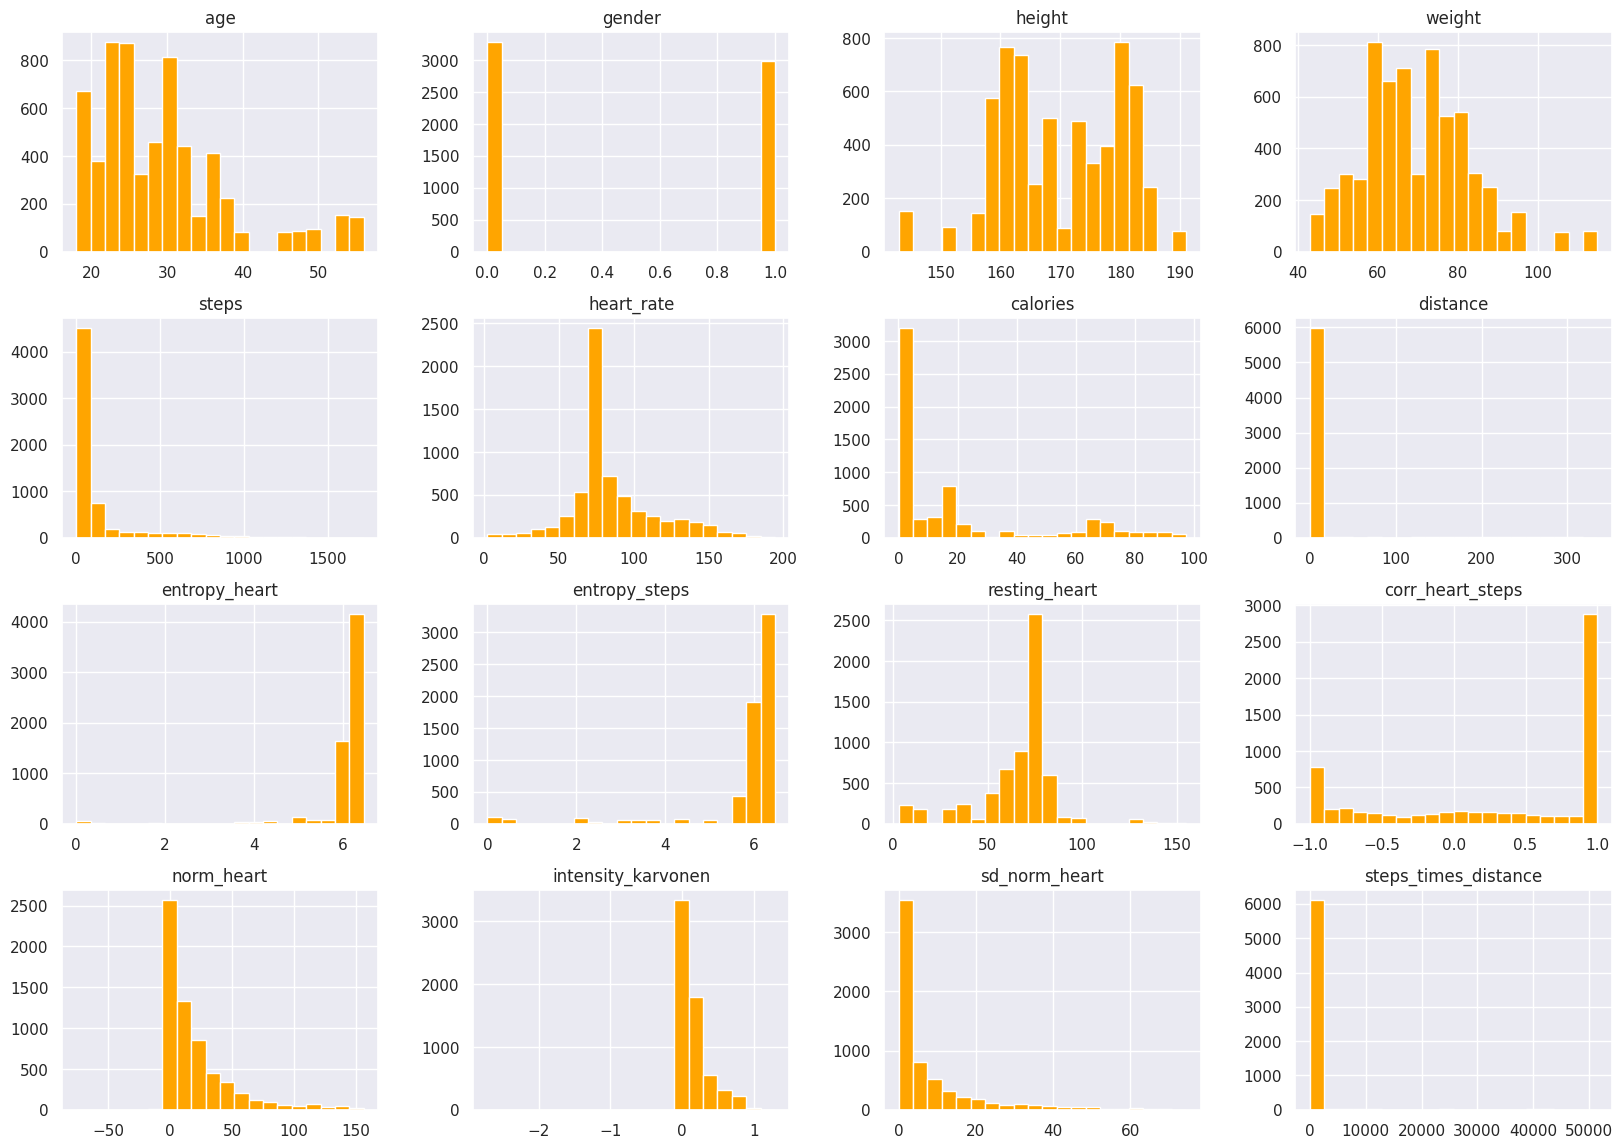

In [74]:
sns.set(font_scale = 1)

df1.hist(bins = 20, color = 'orange', figsize = (20, 14))

## Feature Engineering

### Create a unique identifyer for each participant

In [75]:
df1.columns

Index(['age', 'gender', 'height', 'weight', 'steps', 'heart_rate', 'calories',
       'distance', 'entropy_heart', 'entropy_steps', 'resting_heart',
       'corr_heart_steps', 'norm_heart', 'intensity_karvonen', 'sd_norm_heart',
       'steps_times_distance', 'device', 'activity'],
      dtype='object')

In [76]:
df1.insert(loc=0, column='participant_id', value = df1.set_index(['age', 'gender', 'height', 'weight']).index.factorize()[0]+1)

In [77]:
df1

,participant_id,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,1,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,1,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,1,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,0.000000,1.000000,fitbit,Running 7 METs
6260,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs
6261,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs
6262,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs


In [78]:
df1.groupby('participant_id').count()

,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
participant_id,,,,,,,,,,,,,,,,,,
1,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140
2,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142
3,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146
4,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144
5,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138
6,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156
7,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152
8,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144
9,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148


In [79]:
df1['bmi'] = round(df1.weight / (df1.height/100)**2)
df1.head()

,participant_id,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity,bmi
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying,23.0
1,1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying,23.0
2,1,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying,23.0
3,1,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying,23.0
4,1,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying,23.0


### Pairplot with core features

In [80]:
df1.columns

Index(['participant_id', 'age', 'gender', 'height', 'weight', 'steps',
       'heart_rate', 'calories', 'distance', 'entropy_heart', 'entropy_steps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'device', 'activity', 'bmi'],
      dtype='object')

In [81]:
df1_core_features = df1[['participant_id','age', 'gender', 'height','weight', 'steps', 'heart_rate', 'calories', 'distance', 'bmi']]

df1_core_features

,participant_id,age,gender,height,weight,steps,heart_rate,calories,distance,bmi
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,23.0
1,1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,23.0
2,1,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,23.0
3,1,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,23.0
4,1,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,23.0
...,...,...,...,...,...,...,...,...,...,...
6259,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,29.0
6260,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,29.0
6261,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,29.0
6262,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,29.0


In [ ]:
sns.pairplot(df1_core_features, corner = True)

## Features and Target Split

In [ ]:
df1_apple = df1[df1['device']=='apple watch']
df1_fitbit = df1[df1['device']=='fitbit']

In [ ]:
X_apple = df1_apple.drop(columns = 'activity').drop(columns="device")
y_apple = df1_apple['activity']

X_fitbit = df1_fitbit.drop(columns = 'activity').drop(columns="device")
y_fitbit = df1_fitbit['activity']


## Lable Encoding of Target Value

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
y_apple.unique()

In [ ]:
label_encoder_apple = LabelEncoder()
label_encoder_apple.fit(y_apple)
y_apple_encoded = label_encoder_apple.transform(y_apple)

In [ ]:
y_apple

In [ ]:
y_fitbit.unique()

In [ ]:
label_encoder_fitbit = LabelEncoder()
label_encoder_fitbit.fit(y_fitbit)
y_fitbit_encoded = label_encoder_fitbit.transform(y_fitbit)

## Features scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler_apple = StandardScaler()
df_scaled_apple = pd.DataFrame(scaler_apple.fit_transform(X_apple),columns= scaler_apple.get_feature_names_out())
df_scaled_apple.head()

In [ ]:
scaler_fitbit = StandardScaler()
df_scaled_fitbit = pd.DataFrame(scaler_fitbit.fit_transform(X_fitbit),columns= scaler_fitbit.get_feature_names_out())
df_scaled_fitbit.head()

## Train-Split Data(Apple Watch and Fitbit)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_apple, X_test_apple, y_train_apple, y_test_apple = train_test_split(df_scaled_apple, y_apple_encoded, test_size=0.2, random_state=42)

In [ ]:
X_train_fitbit, X_test_fitbit, y_train_fitbit, y_test_fitbit = train_test_split(df_scaled_fitbit, y_fitbit_encoded, test_size=0.2, random_state=42)